# Feature Selection

🎯 This exercise is a continuation of the previous one, in which you will perform ***feature selection***. 

👇 Run the cell below to load the preprocessed dataset from the *previous challenge 1 - Preprocessing Workflow*.

In [1]:
import pandas as pd

# Run this cell if you 
data = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/clean_dataset.csv")

data.head()

,GrLivArea,BedroomAbvGr,KitchenAbvGr,OverallCond,RoofSurface,CentralAir,SalePrice,Fin,NoGarage,RFn,Unf,sin_MoSold,cos_MoSold
0,0.380070,0.375,0.333333,0.500,0.316729,1.0,208500,0.0,0.0,1.0,0.0,0.500000,0.866025
1,-0.312090,0.375,0.333333,0.875,0.069650,1.0,181500,0.0,0.0,1.0,0.0,0.866025,-0.500000
2,0.497489,0.375,0.333333,0.500,0.228124,1.0,223500,0.0,0.0,1.0,0.0,-0.866025,-0.500000
3,0.390885,0.375,0.333333,0.500,0.442583,1.0,140000,0.0,0.0,0.0,1.0,0.500000,0.866025
4,1.134029,0.500,0.333333,0.500,0.566894,1.0,250000,0.0,0.0,1.0,0.0,-0.500000,0.866025


## (1) Correlation investigation

❓ Plot a heatmap of the ***Pearson Correlation*** between the columns of the dataset ❓

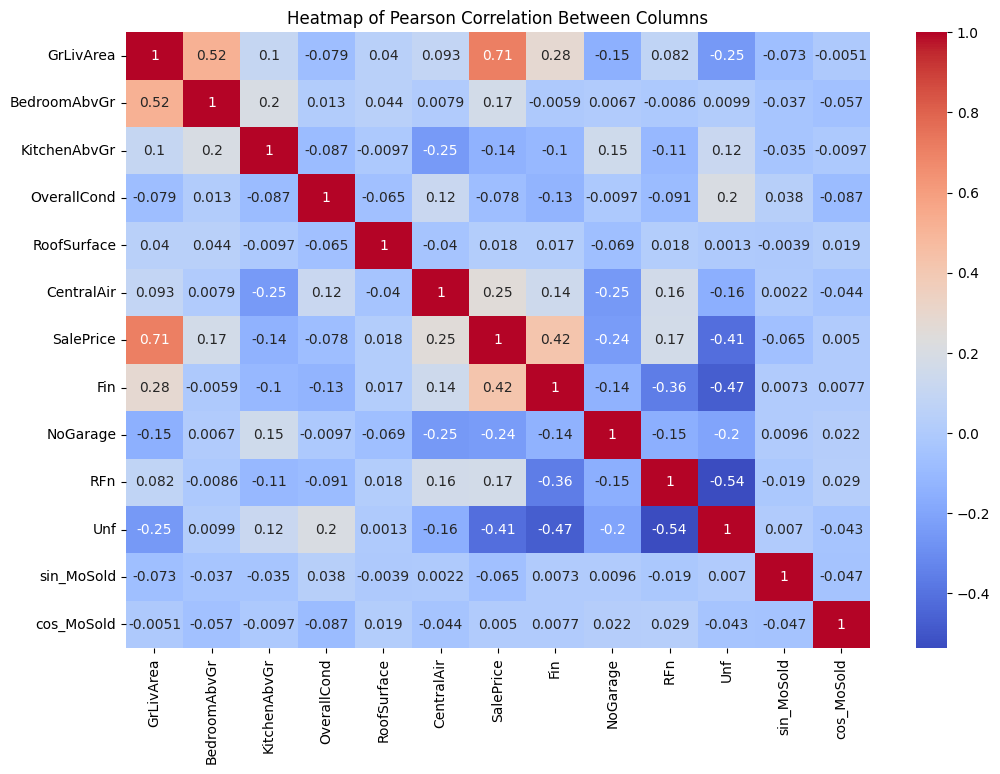

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Pearson Correlation Between Columns')
plt.show()

❓ Visualize the correlation between column pairs in a dataframe ❓

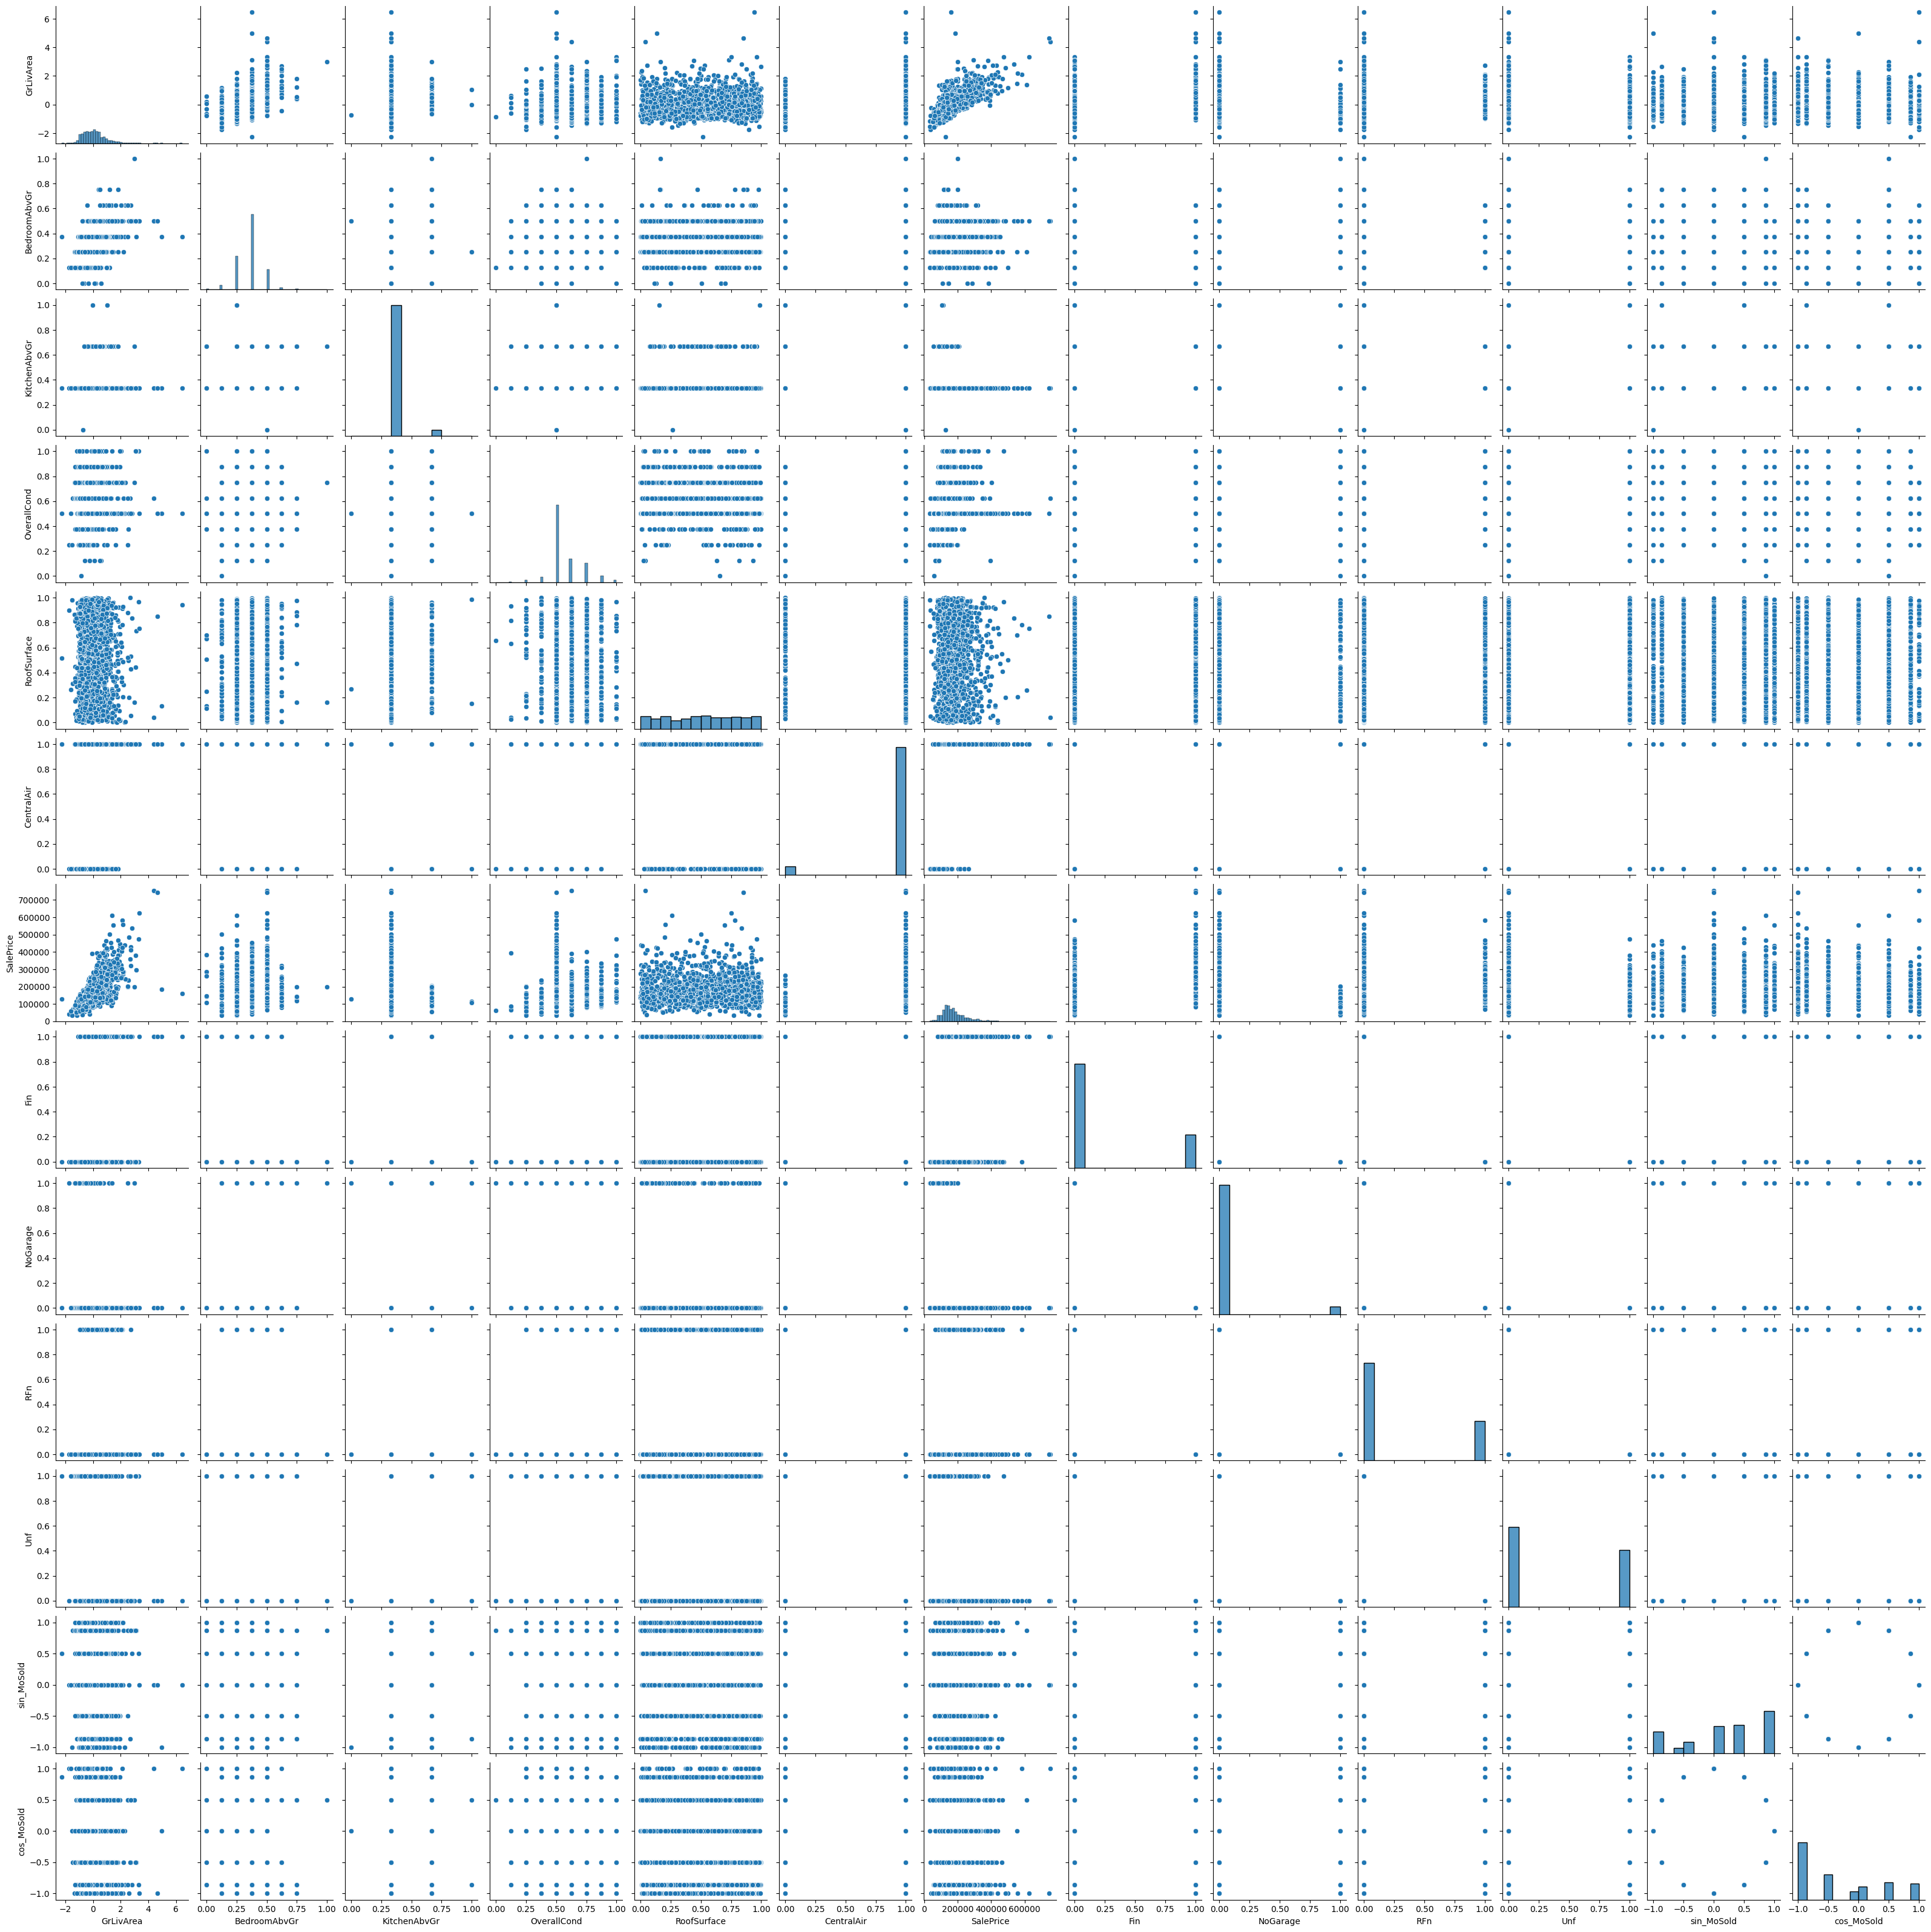

In [5]:
sns.pairplot(data)
plt.show()

❓ How many pairs of features exceed a correlation of 0.9 or -0.9 ❓

*Save your answer as an integer under variable name `correlated_features`*

In [6]:
# Calculating the correlation matrix
correlation_matrix = data.corr()

# Finding pairs of features with correlation greater than 0.9 or less than -0.9 (excluding self-correlation)
correlated_pairs = (correlation_matrix.abs() > 0.9) & (correlation_matrix.abs() < 1)

# Counting the number of such pairs
correlated_features = correlated_pairs.sum().sum() // 2  # Divided by 2 to avoid double counting
correlated_features

0

🧪 **Test your code**

In [7]:
from nbresult import ChallengeResult

result = ChallengeResult('correlation',
                         correlated_features = correlated_features
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_correlation.py::TestCorrelation::test_correlated_features PASSED    [100%]

============================== 1 passed in 0.95s ===============================


💯 You can commit your code:

git add tests/correlation.pickle

git commit -m 'Completed correlation step'

git push origin master



## (2) Base Modelling

❓ Prepare the feature set `X` and target `y`. ❓

*Remember that we want to model the `SalePrice` with the preprocessed features.*

In [ ]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Vérifier les premières lignes de X et y
print(X.head())
print(y.head())

❓ Cross validate a Linear Regression model ❓

*Save the score under variable name `base_model_score`.*

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Create model of RegLin
model = LinearRegression()

# CV
scores = cross_val_score(model, X, y, cv=5)

base_model_score = np.mean(scores)

print("Mean score:", base_model_score)

Mean score: 0.6419144066998052


🧪 **Test your code**

In [21]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (3) Feature Permutation

❓ Perform a feature permutation  and rank the features by order of importance. ❓

In [9]:
# Split features and target
X = data.drop('SalePrice', axis=1)  # Remplacez 'SalePrice' par le nom réel de votre colonne cible
y = data['SalePrice']

# Check features and target
print(X.head())
print(y.head())

# Split data training Vs testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   GrLivArea  BedroomAbvGr  KitchenAbvGr  OverallCond  RoofSurface  \
0   0.380070         0.375      0.333333        0.500     0.316729   
1  -0.312090         0.375      0.333333        0.875     0.069650   
2   0.497489         0.375      0.333333        0.500     0.228124   
3   0.390885         0.375      0.333333        0.500     0.442583   
4   1.134029         0.500      0.333333        0.500     0.566894   

   CentralAir  Fin  NoGarage  RFn  Unf  sin_MoSold  cos_MoSold  
0         1.0  0.0       0.0  1.0  0.0    0.500000    0.866025  
1         1.0  0.0       0.0  1.0  0.0    0.866025   -0.500000  
2         1.0  0.0       0.0  1.0  0.0   -0.866025   -0.500000  
3         1.0  0.0       0.0  0.0  1.0    0.500000    0.866025  
4         1.0  0.0       0.0  1.0  0.0   -0.500000    0.866025  
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


❓ Which feature is the most important ❓

*Save your answer as a `string` under variable name `best_feature`.*

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Create, train model, use RandomForest for best performance
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Effectuer la permutation d'importance des caractéristiques
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# Sort features by importance
sorted_feat_indices = perm_importance.importances_mean.argsort()[::-1]

# display features by importance
for i in sorted_feat_indices:
    print(f"{X.columns[i]}: {perm_importance.importances_mean[i]}")

# store most important feature
best_feature = X.columns[sorted_feat_indices[0]]

print("Most important featue:", best_feature)

GrLivArea: 1.0171065586080945
BedroomAbvGr: 0.12367807298551488
Unf: 0.07870845615672556
Fin: 0.0367346602947214
OverallCond: 0.02773126101751062
NoGarage: 0.01729223433955318
KitchenAbvGr: 0.008336615079582232
CentralAir: 0.005659636123817024
RFn: 0.005161873380948234
cos_MoSold: 0.0016651833407269167
sin_MoSold: 0.001517887135651297
RoofSurface: -0.010381916828317173
Most important featue: GrLivArea


🧪 **Test your code**

In [17]:
from nbresult import ChallengeResult

result = ChallengeResult('feature_permutation',
                         feature = best_feature
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_feature_permutation.py::TestFeature_permutation::test_best_feature PASSED [100%]

============================== 1 passed in 0.04s ===============================


💯 You can commit your code:

git add tests/feature_permutation.pickle

git commit -m 'Completed feature_permutation step'

git push origin master



## (4) Modelling with less complexity

❓ Drop the weak features and cross-validate a new model ❓

* You should aim at maintaining a score close to the previous one. 
* Save the score under variable name `simplified_model_score`.

<details>
    <summary>💡 Hint</summary>
    
You can try dropping features one by one starting from the ones lowest importance until your model score starts dropping significantly.
</details>

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Init ref score with all features
model = LinearRegression()
baseline_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))

# sort features
sorted_features = X.columns[sorted_feat_indices]

# remore feature 1b1
for i in range(len(sorted_features)):
    reduced_features = sorted_features[:-i-1]  # Suppression de la caractéristique la moins importante
    X_train_reduced = X_train[reduced_features]
    
    # Validate reduced model
    model = LinearRegression()
    score = np.mean(cross_val_score(model, X_train_reduced, y_train, cv=5))
    
    # check if score get below significant
    if score < baseline_score - 0.01:  # treshold
        break

simplified_model_score = score

print("Score simplified model:", simplified_model_score)

Score simplified model: 0.6120456032755845


🧪 **Test your code**

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('reduced_complexity_model',
                         model_score = simplified_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/francoisgirard/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/francoisgirard/code/francoisgirard51/05-ML/02-Prepare-the-dataset/data-feature-selection/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_reduced_complexity_model.py::TestReduced_complexity_model::test_reduced_complexity_score PASSED [100%]

============================== 1 passed in 0.31s ===============================


💯 You can commit your code:

git add tests/reduced_complexity_model.pickle

git commit -m 'Completed reduced_complexity_model step'

git push origin master



P.S. Do you remember your score before preprocessing from Challenge #1? How is it different after preprocessing?

🏁 Congratulations! Now, you know a bit more how to do ***feature selection*** !

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!